In [1]:
SIZE = (210, 160, 3)
NUM_OBS = 500

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/home/rohankalbag/ee782-project/mlproj/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


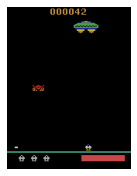

In [2]:
from matplotlib import animation
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np

# reference for saving frames as gif : https://gist.github.com/botforge/64cbb71780e6208172bbf03cd9293553?permalink_comment_id=4416389#gistcomment-4416389

def save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=60)

env = gym.make("ALE/Assault-v5", render_mode="rgb_array")

observation, info = env.reset()
frames = []
obs, rew = [], []
for t in range(100):
    #Render to frames buffer
    frames.append(env.render())
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    obs.append(observation)
    rew.append(reward)
    if terminated or truncated:
        break
env.close()
save_frames_as_gif(frames)

In [3]:
def visualize_frames(frames):
    plt.imshow(np.hstack(frames))
    plt.axis('off')
    plt.show()

def visualize_rewards(rew):
    ax = plt.figure(figsize=(6, 3))
    plt.plot(rew)
    plt.xlabel("Time step in Frames")
    plt.ylabel("Reward")
    plt.show()


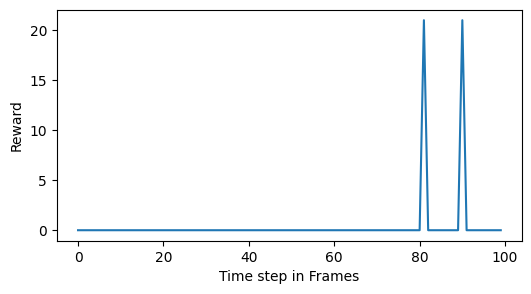

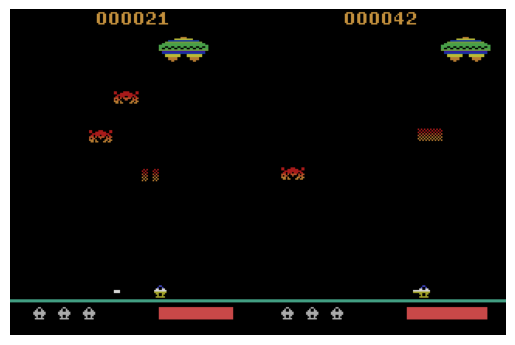

In [4]:
obs = np.array(obs)
rew = np.array(rew)
filter_obs = obs[rew > 0]

visualize_rewards(rew)

if len(filter_obs) > 0:
    visualize_frames(filter_obs)

In [5]:
import torch
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
!nvidia-smi

Wed Nov  1 20:09:52 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.50                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2070 w...    On | 00000000:01:00.0  On |                  N/A |
| N/A   56C    P8               12W /  N/A|    695MiB /  8192MiB |     15%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc=nn.Sequential(
            nn.Conv2d(3,8,5,bias=False),
            nn.BatchNorm2d(8),
            nn.ReLU(),
 
            nn.MaxPool2d(4,4),
 
 
            nn.Conv2d(8,32,3,bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
 
            nn.MaxPool2d(2,2),
 
            nn.Conv2d(32,64,3,bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
 
            nn.MaxPool2d(2,2),
 
            nn.Conv2d(64,64,3,bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
 
            nn.MaxPool2d((2,3),2),
 
        )
        
    def forward(self,x):
        x=self.fc(x)
        x=x.view(-1,512)
        return x